In [2]:
import fetch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import plugins

%matplotlib inline

In [3]:
weatherDF = fetch.get_weather(usecols='lat,lon,temp_K', datetime='2015-01-01_00:00')

weatherDF

lat        lon      temp_K
0    41.866955 -87.638916  268.014771
1    41.866962 -87.637787  268.020935
2    41.866970 -87.636658  268.026825
3    41.866982 -87.635498  268.032196
4    41.866982 -87.634369  268.036774
..         ...        ...         ...
385  41.888241 -87.627747  268.083710
386  41.888252 -87.626587  268.090057
387  41.888252 -87.625458  268.097321
388  41.888268 -87.624329  268.106537
389  41.888271 -87.623169  268.114075

[390 rows x 3 columns]

In [4]:
locations = weatherDF[['lat', 'lon']].values.tolist()
len(locations)

390

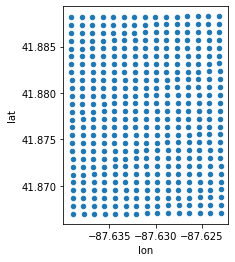

In [5]:
weatherDF.plot(kind='scatter', x='lon', y='lat').set_aspect('equal')
plt.show()

In [6]:
map = folium.Map(locations[len(locations)//2 - 1], zoom_start=14)

minLat = weatherDF.lat.min()
maxLat = weatherDF.lat.max()
minLon = weatherDF.lon.min()
maxLon = weatherDF.lon.max()

points = [[minLat, minLon], [minLat, maxLon], [maxLat, minLon], [maxLat, maxLon]]
folium.Rectangle(bounds=points, color='#ff7800', fill=True, fill_color='#ffff00', fill_opacity=0.2).add_to(map)
folium.Rectangle(bounds=points, color='#ff7800', fill=True, fill_color='#ffff00', fill_opacity=0.2).add_to(map)

for point in locations:
    folium.Marker(point, tooltip=f"({point[0]},{point[1]})").add_to(map)
    
points
-87.63916,41.866955


[[41.866955, -87.63916],
 [41.866955, -87.622986],
 [41.888271, -87.63916],
 [41.888271, -87.622986]]

In [6]:
elecDF = pd.read_json('../processed_data/moo_morph.json', orient='index')
elecDF.sort_index(inplace=True)

elecDF

Area [m2]  Mean Average Height [m]  Electricity [GJ]  \
1          285.41                     1.74            259.35   
2          313.14                     2.17            295.28   
4          251.16                     2.97            303.20   
5          288.21                     3.03            330.35   
10         282.49                     3.73            354.79   
...           ...                      ...               ...   
16526    23135.86                    77.78           8547.09   
16941    21757.03                    20.63           7798.86   
16953    48278.80                    44.16          14685.02   
17163    11660.55                    68.68           5645.33   
329702  222535.19                   112.41          57734.03   

        Natural Gas [GJ]  Water [m3]        Lat        Lon  \
1                  45.13       15.94  41.867863 -87.628662   
2                  43.49       17.48  41.867859 -87.629822   
4                  41.07       14.02  41.867859 -87.629822   
5                  41.22       16.09  41.867863 -87.628662   
10                 40.52       15.77  41.867870 -87.626404   
...                  ...         ...        ...        ...   
16526            6579.77   188565.72  41.886570 -87.624298   
16941            1323.13     1214.85  41.886547 -87.625458   
16953           10194.15   322812.99  41.886547 -87.625458   
17163            3926.49   100076.78  41.887413 -87.624329   
329702          41176.18  1368738.92  41.879772 -87.625366   

        Weather Location Lat  Weather Location Lon  
1                  41.867863            -87.628662  
2                  41.867859            -87.629822  
4                  41.867859            -87.629822  
5                  41.867863            -87.628662  
10                 41.867870            -87.626404  
...                      ...                   ...  
16526              41.886570            -87.624298  
16941              41.886547            -87.625458  
16953              41.886547            -87.625458  
17163              41.887413            -87.624329  
329702             41.879772            -87.625366  

[318 rows x 9 columns]

In [7]:
buildingMap = folium.Map(locations[len(locations)//2 - 1], zoom_start=14)

folium.Rectangle(bounds=points, color='#ff7800', fill=True, fill_color='#ffff00', fill_opacity=0.2).add_to(buildingMap)
folium.Rectangle(bounds=points, color='#ff7800', fill=True, fill_color='#ffff00', fill_opacity=0.2).add_to(buildingMap)

for id, row in elecDF.iterrows():
    folium.Marker([row['Lat'],row['Lon']],tooltip=id).add_to(buildingMap)

buildingMap

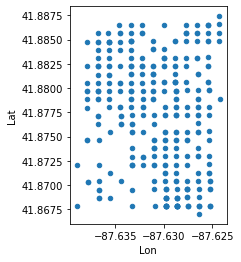

In [8]:
elecDF.plot(kind='scatter', x='Lon', y='Lat').set_aspect('equal')
plt.show()

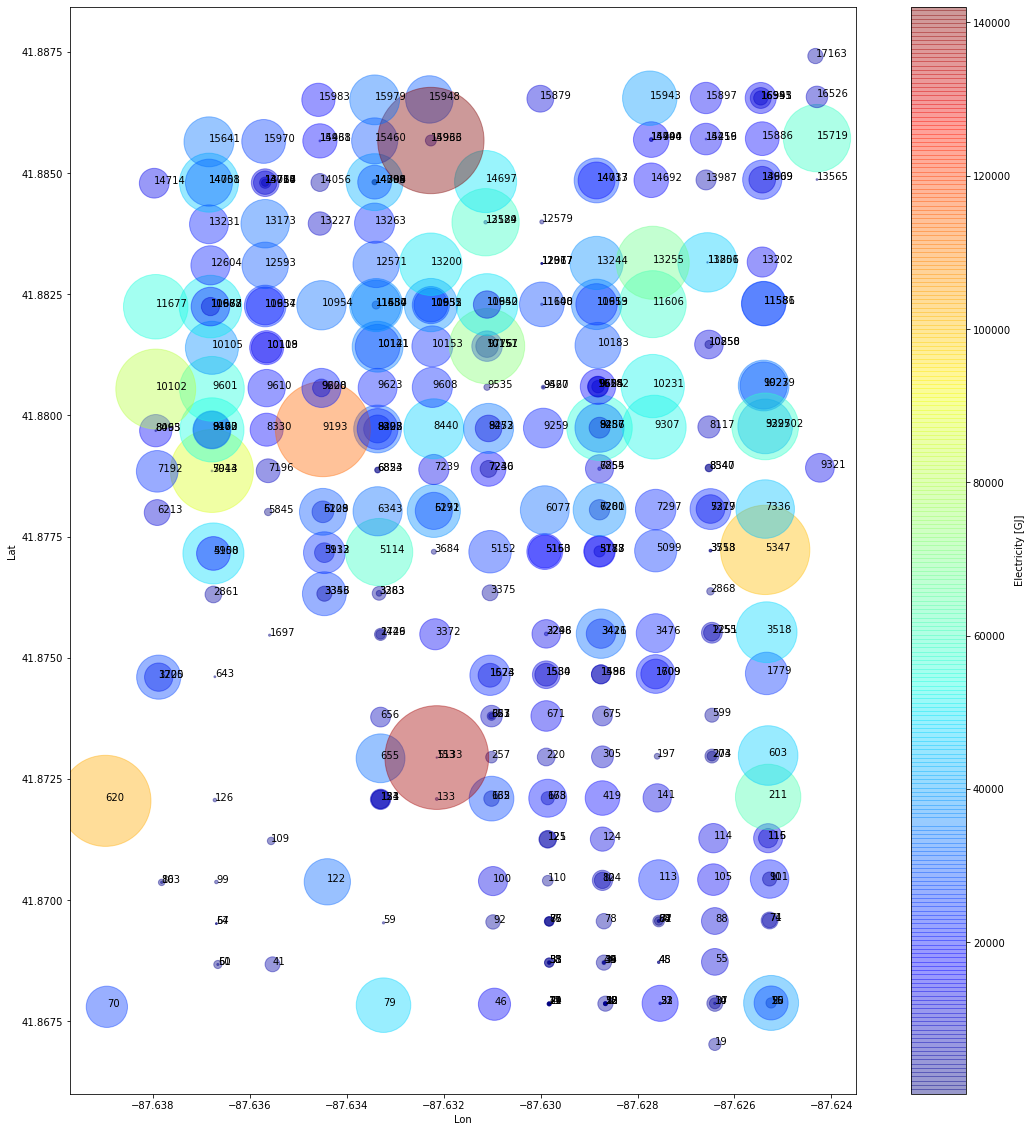

In [33]:
fig, ax = plt.subplots()

elecDF.plot(kind="scatter", x="Lon", y="Lat",
    s=np.array(elecDF['Area [m2]']/50,dtype=np.float64), ax=ax,
    c="Electricity [GJ]", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,20)
).set_aspect('equal')

for id, row in elecDF.iterrows():
    ax.annotate(id, row[['Lon', 'Lat']])


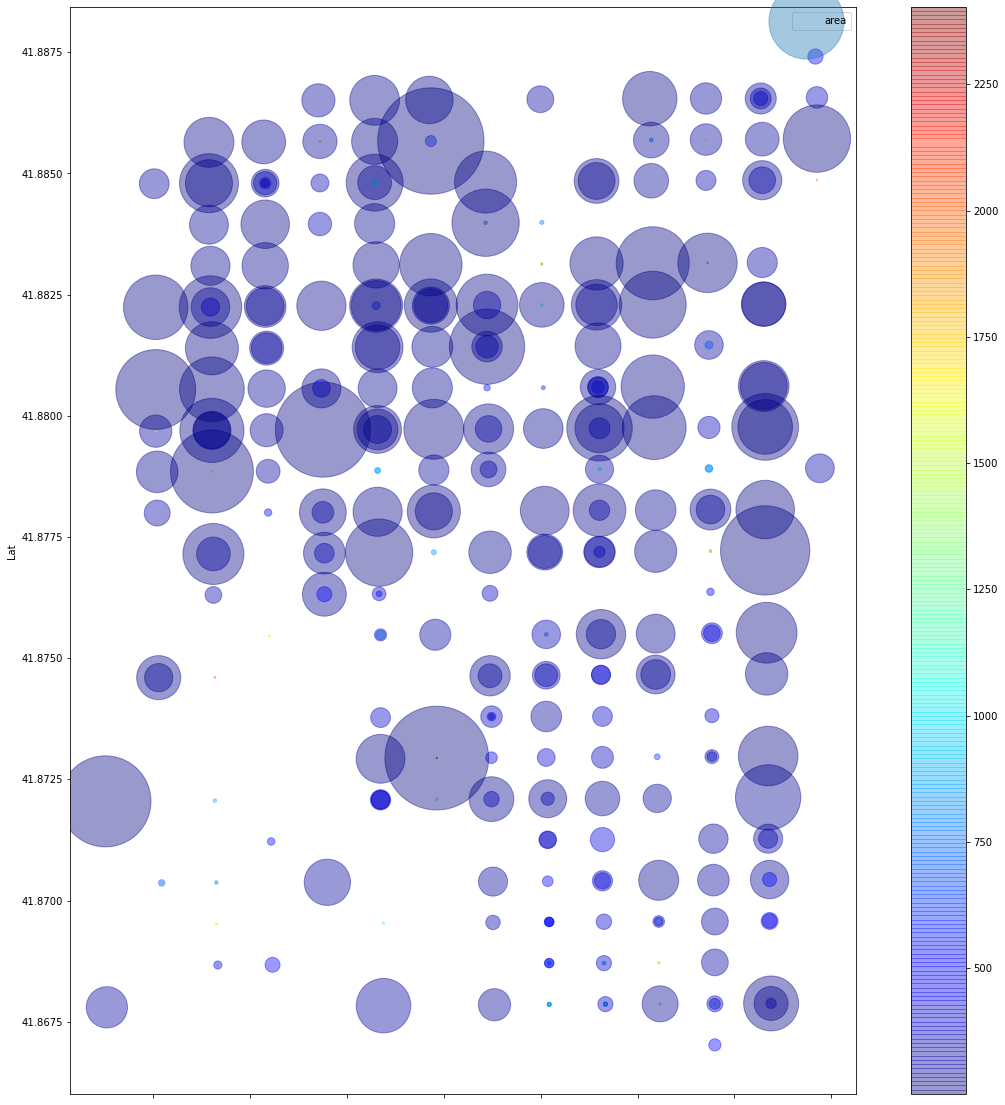

In [10]:
elecDF.plot(kind="scatter", x="Lon", y="Lat",
    s=np.array(elecDF['Area [m2]']/50,dtype=np.float64), label="area",
    c=elecDF['Electricity [GJ]']*1000/elecDF['Area [m2]'], cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,20)
).set_aspect('equal')

plt.legend()
plt.show()


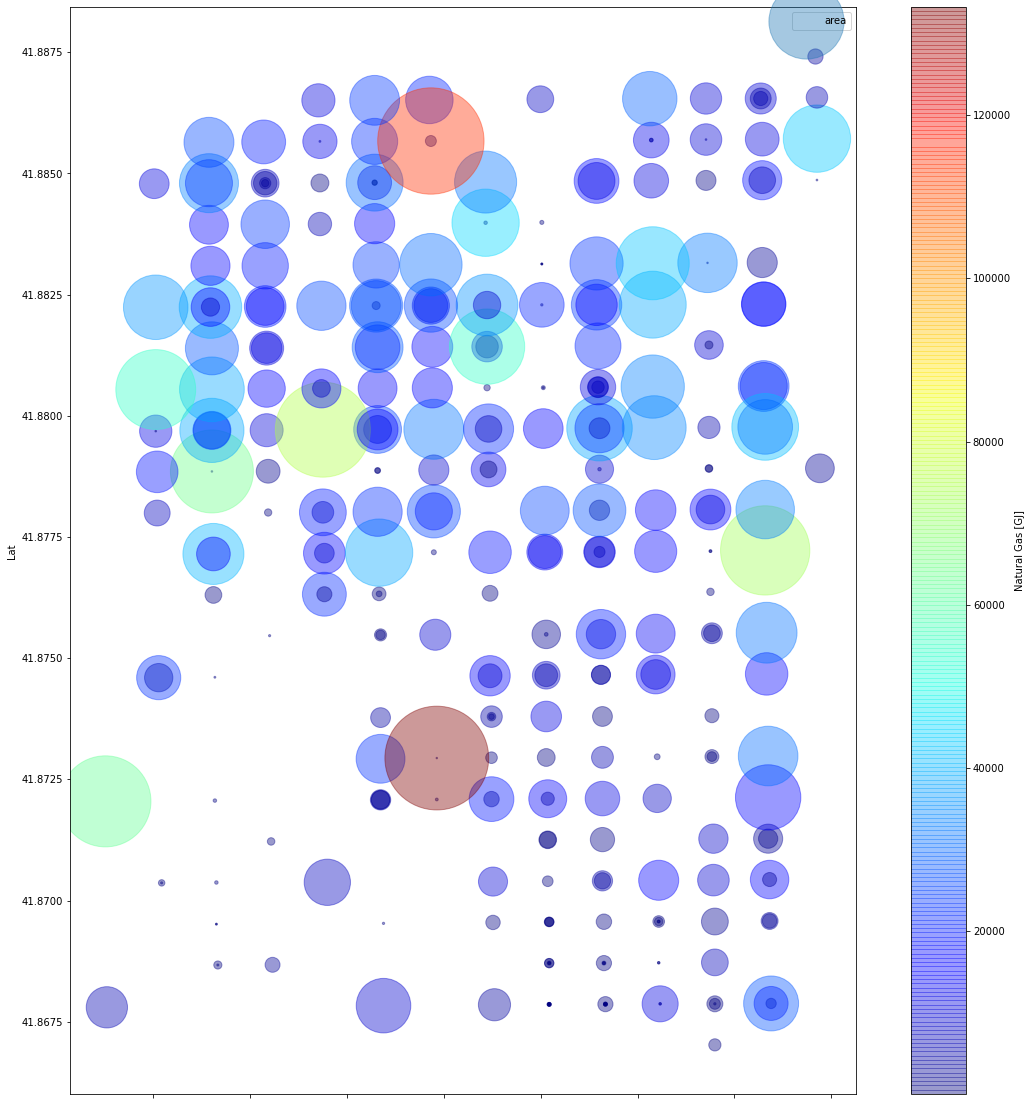

In [11]:
elecDF.plot(kind="scatter", x="Lon", y="Lat",
    s=np.array(elecDF['Area [m2]']/50,dtype=np.float64), label="area",
    c='Natural Gas [GJ]', cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,20)
).set_aspect('equal')

plt.legend()
plt.show()

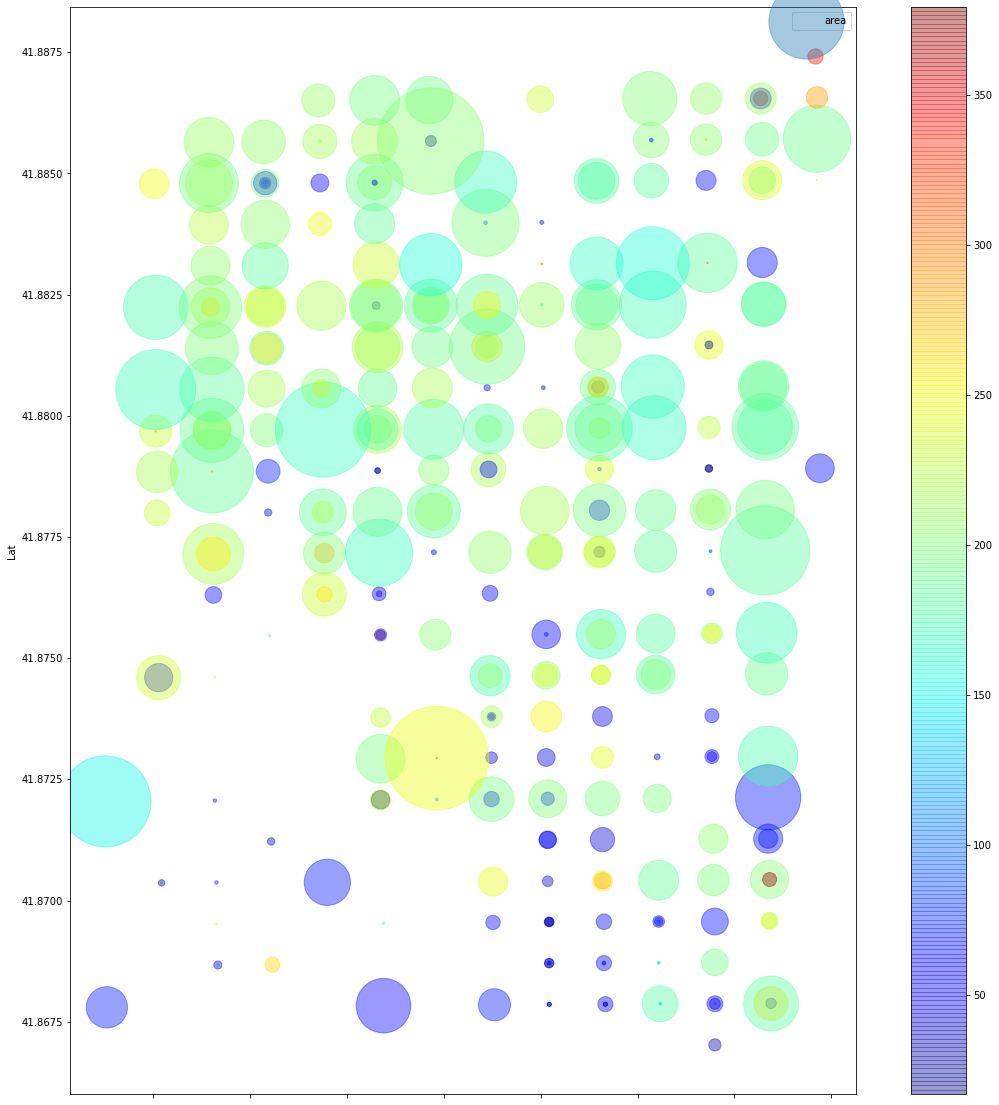

In [12]:
elecDF.plot(kind="scatter", x="Lon", y="Lat",
    s=np.array(elecDF['Area [m2]']/50,dtype=np.float64), label="area",
    c=elecDF['Natural Gas [GJ]']*1000/elecDF['Area [m2]'], cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,20)
).set_aspect('equal')

plt.legend()
plt.show()

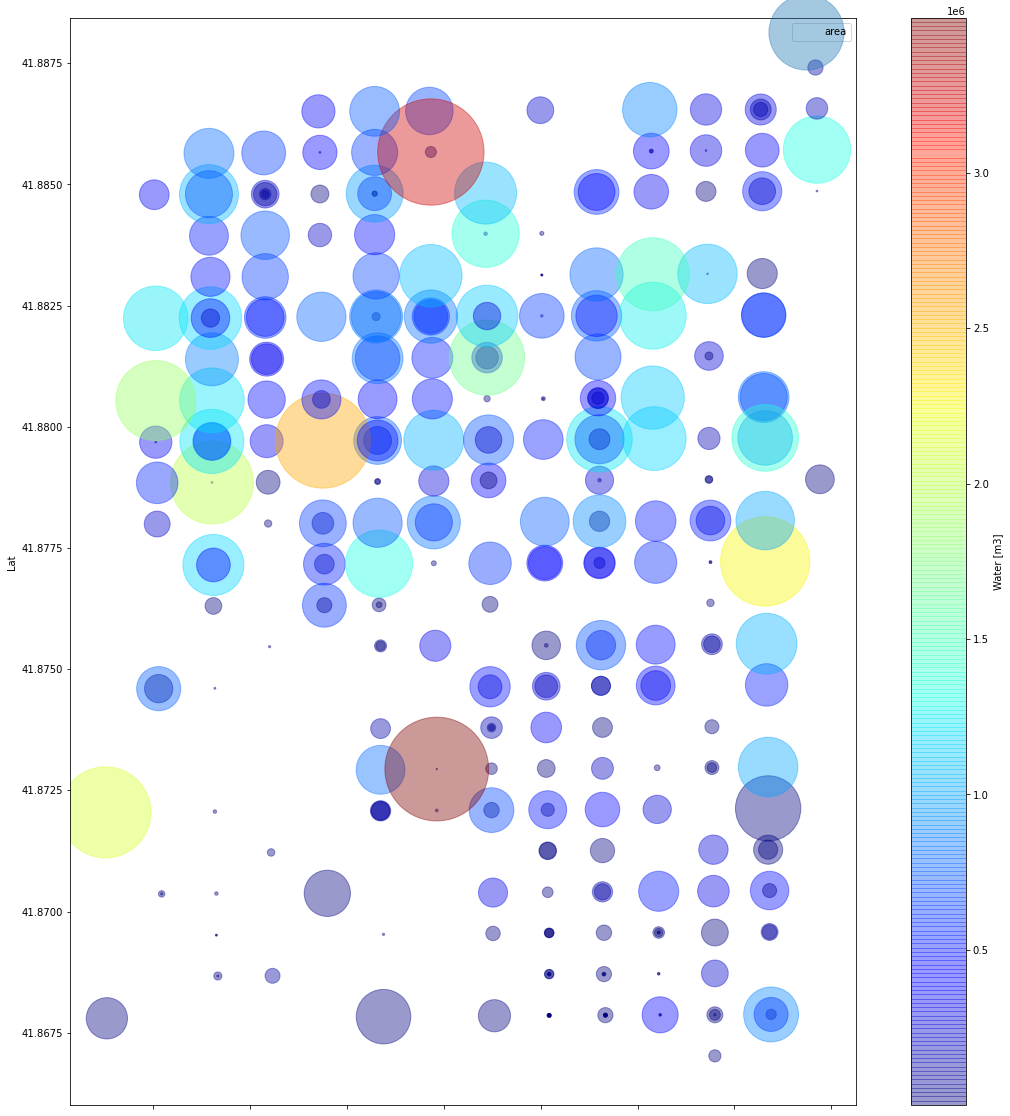

In [13]:
elecDF.plot(kind="scatter", x="Lon", y="Lat",
    s=np.array(elecDF['Area [m2]']/50,dtype=np.float64), label="area",
    c="Water [m3]", cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,20)
).set_aspect('equal')

plt.legend()
plt.show()

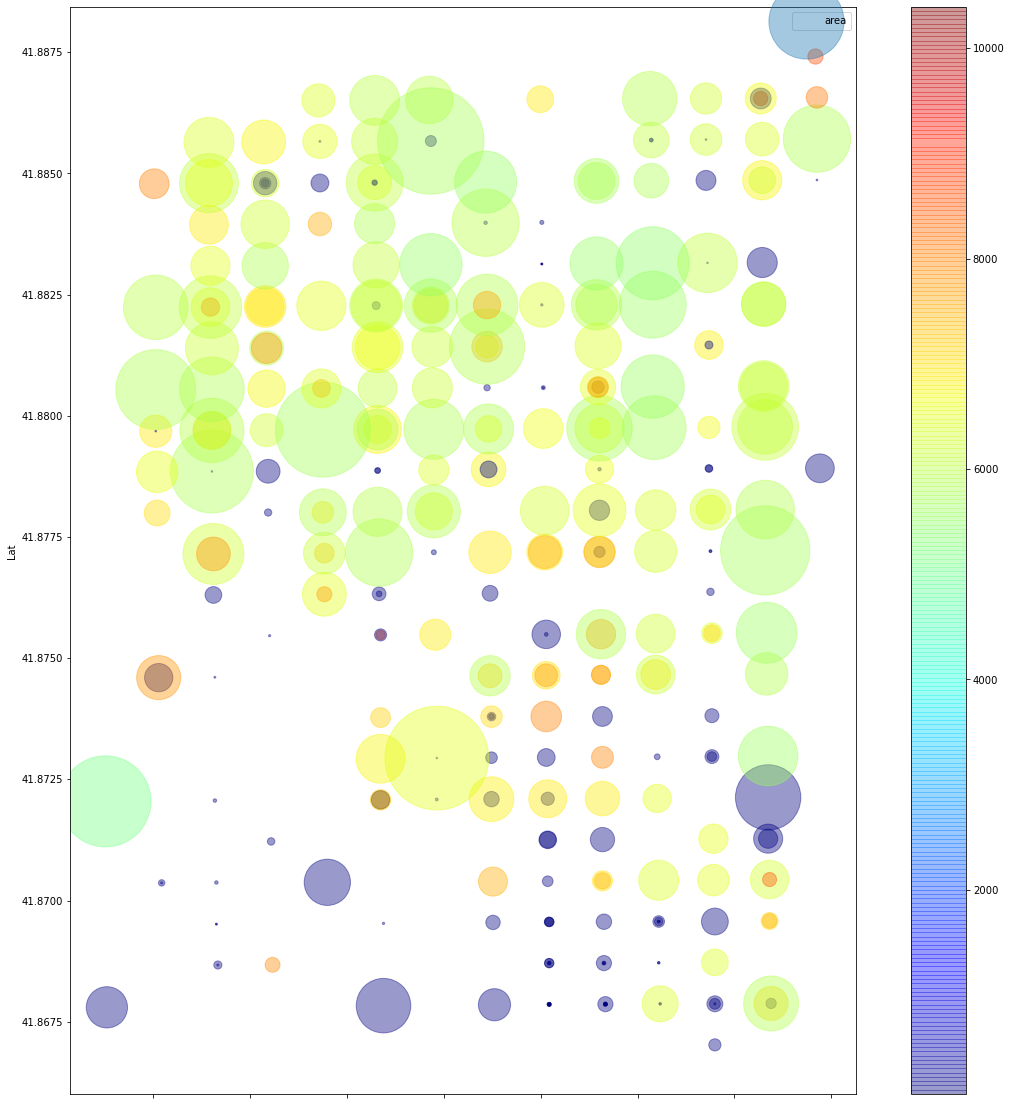

In [14]:
elecDF.plot(kind="scatter", x="Lon", y="Lat",
    s=np.array(elecDF['Area [m2]']/50,dtype=np.float64), label="area",
    c=elecDF['Water [m3]']*1000/elecDF['Area [m2]'], cmap=plt.get_cmap("jet"),
    colorbar=True, alpha=0.4, figsize=(20,20)
).set_aspect('equal')

plt.legend()
plt.show()

In [15]:
elecMap = folium.Map(locations[len(locations)//2 - 1], zoom_start=14)
for id, row in elecDF.iterrows():
    folium.CircleMarker([row['Lat'], row['Lon']],
                        radius=row['Area [m2]']/150000,
                        tooltip=id,
                        fill_color='#3db7e4'
                        ).add_to(elecMap)

buildingArr = elecDF[['Lat', 'Lon', 'Electricity [GJ]']].values

elecMap.add_child(plugins.HeatMap(buildingArr, radius=15))
elecMap